Components: 1
Accuracy: 0.8947368421052632
Precision: 0.9230769230769231
Recall: 0.8955223880597015
------------------------------
Components: 2
Accuracy: 0.9122807017543859
Precision: 0.9523809523809523
Recall: 0.8955223880597015
------------------------------
Components: 3
Accuracy: 0.9122807017543859
Precision: 0.9253731343283582
Recall: 0.9253731343283582
------------------------------
Components: 4
Accuracy: 0.9385964912280702
Precision: 0.9411764705882353
Recall: 0.9552238805970149
------------------------------
Components: 5
Accuracy: 0.9824561403508771
Precision: 0.9710144927536232
Recall: 1.0
------------------------------
Components: 6
Accuracy: 0.9824561403508771
Precision: 0.9710144927536232
Recall: 1.0
------------------------------
Components: 7
Accuracy: 0.956140350877193
Precision: 0.9696969696969697
Recall: 0.9552238805970149
------------------------------
Components: 8
Accuracy: 0.956140350877193
Precision: 0.9696969696969697
Recall: 0.9552238805970149
---------------

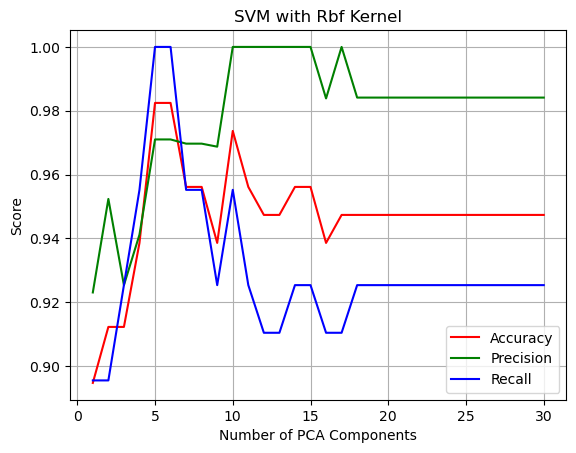

Components: 1
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
------------------------------
Components: 2
Accuracy: 0.9210526315789473
Precision: 0.953125
Recall: 0.9104477611940298
------------------------------
Components: 3
Accuracy: 0.9210526315789473
Precision: 0.953125
Recall: 0.9104477611940298
------------------------------
Components: 4
Accuracy: 0.9473684210526315
Precision: 0.9552238805970149
Recall: 0.9552238805970149
------------------------------
Components: 5
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
------------------------------
Components: 6
Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
------------------------------
Components: 7
Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
------------------------------
Components: 8
Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716
----

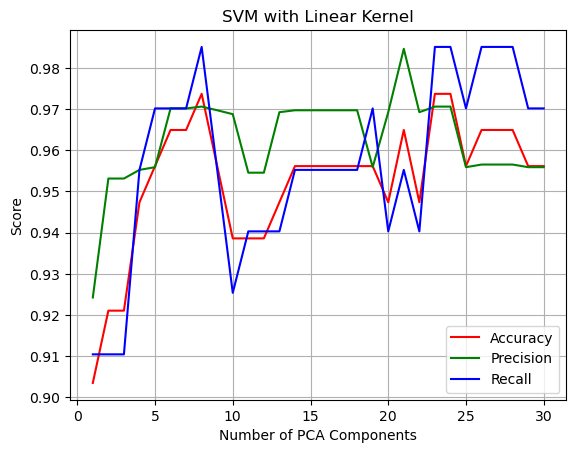

Components: 1
Accuracy: 0.8596491228070176
Precision: 0.8072289156626506
Recall: 1.0
------------------------------
Components: 2
Accuracy: 0.9298245614035088
Precision: 0.9154929577464789
Recall: 0.9701492537313433
------------------------------
Components: 3
Accuracy: 0.956140350877193
Precision: 0.9428571428571428
Recall: 0.9850746268656716
------------------------------
Components: 4
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
------------------------------
Components: 5
Accuracy: 0.9649122807017544
Precision: 0.9565217391304348
Recall: 0.9850746268656716
------------------------------
Components: 6
Accuracy: 0.9736842105263158
Precision: 0.9571428571428572
Recall: 1.0
------------------------------
Components: 7
Accuracy: 0.9736842105263158
Precision: 0.9571428571428572
Recall: 1.0
------------------------------
Components: 8
Accuracy: 0.9649122807017544
Precision: 0.9565217391304348
Recall: 0.9850746268656716
------------------------------

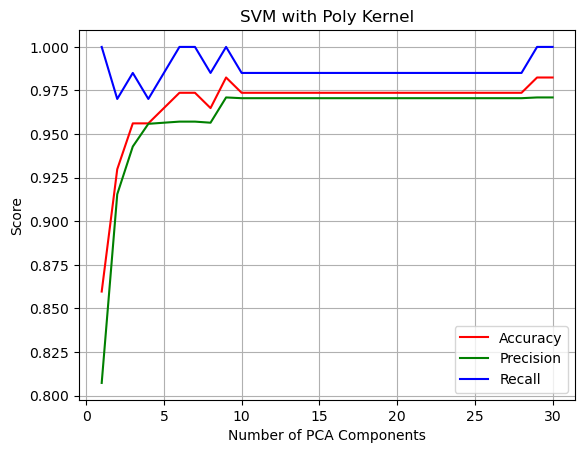

Components: 1
Accuracy: 0.8508771929824561
Precision: 0.890625
Recall: 0.8507462686567164
------------------------------
Components: 2
Accuracy: 0.8508771929824561
Precision: 0.8787878787878788
Recall: 0.8656716417910447
------------------------------
Components: 3
Accuracy: 0.868421052631579
Precision: 0.8939393939393939
Recall: 0.8805970149253731
------------------------------
Components: 4
Accuracy: 0.8771929824561403
Precision: 0.9206349206349206
Recall: 0.8656716417910447
------------------------------
Components: 5
Accuracy: 0.8859649122807017
Precision: 0.921875
Recall: 0.8805970149253731
------------------------------
Components: 6
Accuracy: 0.8859649122807017
Precision: 0.921875
Recall: 0.8805970149253731
------------------------------
Components: 7
Accuracy: 0.8859649122807017
Precision: 0.921875
Recall: 0.8805970149253731
------------------------------
Components: 8
Accuracy: 0.8859649122807017
Precision: 0.921875
Recall: 0.8805970149253731
------------------------------
Com

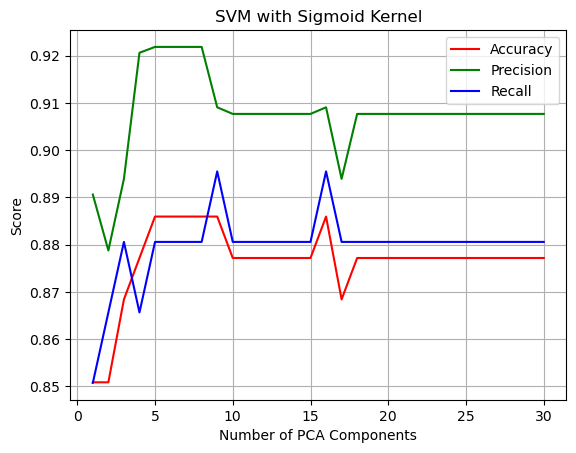

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Combine the data and labels
data_combined = np.hstack((X, y.reshape(-1, 1)))
column_names = np.append(data.feature_names, 'label')
df = pd.DataFrame(data_combined, columns=column_names)

# Replace labels with class names
df['label'].replace({0: 'Benign', 1: 'Malignant'}, inplace=True)

# Separate input features and target variable
X_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, train_size=0.8, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Classifier
logistic_clf = LogisticRegression(random_state=0)
logistic_clf.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_clf.predict(X_test_scaled)

# Standardize the entire dataset
X_scaled = scaler.fit_transform(X_df)

def evaluate_pca_svm(X, y, kernel_type, max_components=30, C_value=1E2):
    accuracy, precision, recall = [], [], []
    
    for k in range(1, max_components + 1):
        pca = PCA(n_components=k)
        X_pca = pca.fit_transform(X)
        X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, train_size=0.8, random_state=0)
        
        clf = svm.SVC(kernel=kernel_type, C=C_value)
        clf.fit(X_train_pca, y_train_pca)
        y_pred_pca = clf.predict(X_test_pca)
        
        accuracy.append(metrics.accuracy_score(y_test_pca, y_pred_pca))
        precision.append(metrics.precision_score(y_test_pca, y_pred_pca, pos_label='Malignant'))
        recall.append(metrics.recall_score(y_test_pca, y_pred_pca, pos_label='Malignant'))
        
        print(f"Components: {k}")
        print(f"Accuracy: {accuracy[-1]}")
        print(f"Precision: {precision[-1]}")
        print(f"Recall: {recall[-1]}")
        print("-" * 30)
    
    return accuracy, precision, recall

kernels = ['rbf', 'linear', 'poly', 'sigmoid']
for kernel in kernels:
    accuracy, precision, recall = evaluate_pca_svm(X_scaled, y_df, kernel)
    
    plt.figure()
    plt.plot(range(1, len(accuracy) + 1), accuracy, label='Accuracy', color='red')
    plt.plot(range(1, len(precision) + 1), precision, label='Precision', color='green')
    plt.plot(range(1, len(recall) + 1), recall, label='Recall', color='blue')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Score')
    plt.legend()
    plt.title(f'SVM with {kernel.capitalize()} Kernel')
    plt.grid(True)
    plt.show()